# Deep Neural Networks Laboration

Data used in this laboration are from the Kitsune Network Attack Dataset, https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset . We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

You need to answer all questions in this notebook.

# Part 1: Get the data

Use `wget` in the terminal of your cloud machine (in the same directory as where you have saved this notebook) to download the data, i.e.

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_dataset.csv.gz

wget https://archive.ics.uci.edu/ml/machine-learning-databases/00516/mirai/Mirai_labels.csv.gz

Then unpack the files using `gunzip` in the terminal, i.e.

gunzip Mirai_dataset.csv.gz

gunzip Mirai_labels.csv.gz

# Part 3: Hardware

In deep learning, the computer hardware is very important. You should always know what kind of hardware you are working on.

Question 1: What graphics card is available in the cloud machine? Run 'nvidia-smi' in the terminal.

### Answer 1: 
Tesla K80

Question 2: Google the name of the graphics card, how many CUDA cores does it have?

### Answer 2:
4992 CUDA cores

Question 3: How much memory does the graphics card have?

### Answer 3:
11441 MiB

Question 4: What is stored in the GPU memory while training a DNN ?

### Answer 4:
Processes like calculations and temporary memory file. The GPU stores a batch of the input data, the parameters to train, the gradients of the parameters, and intermediate outputs as well as activations of different layers.

Question 5: What CPU is available in the cloud machine? How many cores does it have? Run 'lscpu' in the terminal.

### Answer 5:
Intel (R) Xenon(R) CPU E5-2690 with 6 cores per socket

Question 6: How much CPU memory (RAM) is available in the cloud machine? Run 'free -g' in the terminal.

### Answer 6:
53 GB

# Part 4: Load the data

Load the dataset from the prepared npy files


In [1]:
from numpy import genfromtxt
import numpy as np

# Load data from numpy arrays, for faster loading
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')

# Remove the first 24 covariates
X = X[:,24:116]

print('The covariates have size {}.'.format(X.shape))
print('The labels have size {}.'.format(Y.shape))

# Print the number of examples of each class
print(len(X[Y == 0]))
print(len(X[Y == 1]))

The covariates have size (764137, 92).
The labels have size (764137,).
121621
642516


# Part 5: How good is a naive classifier?

Question 7: Given the distribution of examples, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by random chance.

### Answer 7:

Considering that naive classifier takes the assumption of all examples belonging to one class, in our data class 1 contains by far the higher proportion of examples (642516 out of 764137) which is approximately 84% of the total examples. Therefore, the classification performance the naive classifier can obtain by random chance here is 84%.

In [2]:
# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()
np.isnan(X)

# Print the number of NaNs (not a number) in the labels
print(np.count_nonzero(np.isnan(Y)))

# Print the number of NaNs in the covariates
print(np.count_nonzero(np.isnan(X)))


0
0


# Part 6: Preprocessing

Lets do some simple preprocessing

In [3]:
# Convert covariates to floats
X = X.astype(float)
# Convert labels to ints
Y = Y.astype(int)
# Remove mean of each covariate (column)
Xmeans = X.mean(axis = 0)
MeanCorrected = X - Xmeans

# Divide each covariate (column) by its standard deviation
Xstd = X.std(axis = 0)
X = MeanCorrected/Xstd 

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
#print(round(np.mean(X), 3))
#print(round(np.std(X), 3))

print(np.round(np.mean(X,axis=0), 5))
print(np.std(X,axis=0))

[-0. -0.  0.  0.  0.  0.  0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0.
 -0.  0. -0.  0. -0. -0. -0. -0.  0.  0.  0. -0. -0.  0. -0.  0.  0.  0.
 -0. -0. -0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0.  0. -0.  0.  0.  0.
  0.  0.  0.  0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0.
 -0. -0. -0.  0.  0.  0.  0. -0. -0. -0.  0. -0. -0.  0. -0. -0.  0.  0.
  0. -0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Part 7: Split the dataset

Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables

Xtrain (70%)

Xtemp  (30%)

Ytrain (70%)

Ytemp  (30%)


In [4]:
# Your code

a = int(.7*len(X))
n = len(X)
Xtrain = X[0:a,:]
Ytrain = Y[0:a]

Xtemp = X[a:n, :]
Ytemp = Y[a:n]

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%

print(len(Xtrain[Ytrain == 0]))
print(len(Xtrain[Ytrain == 1]))

print(len(Xtemp[Ytemp == 0]))
print(len(Xtemp[Ytemp == 1]))

Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
121621
413274
0
229242


# Part 8: Number of examples per class

Question 8: Can we use the dataset as it is? Why not?

Lets randomly shuffle the data, to get some examples of each class in training data and in the remaining 30%. Use the function `shuffle` in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

### Answer 8:
No. From the result in the previous block we see that no instances of class 0 exists in the 30% percent temp data. This would mean the samples is not randomly ordered and would lead to inaccurate results after running it through DNN.

In [5]:
from sklearn.utils import shuffle

# Randomly shuffle data, to get both classes in training and testing
X, Y = shuffle(X, Y, random_state=12345)

# Divide the data into training and validation/test again
a = int(.7*len(X))
n = len(X)
Xtrain = X[0:a,:]
Ytrain = Y[0:a]

Xtemp = X[a:n, :]
Ytemp = Y[a:n]

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

# Print the number of examples of each class, for the training data and the remaining 30%

print(len(Xtrain[Ytrain == 0]))
print(len(Xtrain[Ytrain == 1]))

print(len(Xtemp[Ytemp == 0]))
print(len(Xtemp[Ytemp == 1]))


Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).
85127
449768
36494
192748


#  Part 9: Split non-training data data into validation and test
Split your non-training data (Xtemp, Ytemp) into 50% validation (Xval, Yval) and 50% testing (Xtest, Ytest), we use a function from scikit learn. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [6]:
from sklearn.model_selection import train_test_split

Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size = 0.5, random_state = 12345)



print('The validation and test data have size {}, {}, {} and {}'.format(Xval.shape, Xtest.shape, Yval.shape, Ytest.shape))

The validation and test data have size (114621, 92), (114621, 92), (114621,) and (114621,)


# Part 10: DNN classification

Finish this code to create a first version of the classifier using a DNN. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See https://keras.io/layers/core/ for information on how the `Dense()` function works

Import a relevant cost / loss function for binary classification from keras.losses (https://keras.io/losses/)

See https://keras.io/models/model/ for how to compile, train and evaluate the model

In [63]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
from keras.layers import Dropout

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_DNN(input_shape, n_layers, n_nodes, act_fun='sigmoid', optimizer='sgd', learning_rate=0.01, 
              use_bn=False, use_dropout=False, use_custom_dropout=False):
    
    # Setup optimizer, depending on input parameter string
    if optimizer == 'sgd':
        opt = SGD(lr=learning_rate)
    elif optimizer == 'adam':
        opt = Adam(lr=learning_rate)
    else:
        raise ValueError('Optimizer should be sgd or adam')
        
    #sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    # Setup a sequential model
    model = Sequential()
    
    # Defining conditions for dropout
    
    for i in range(n_layers-1):
        model.add(Dense(n_nodes, activation=act_fun))
        
        if use_dropout:
            model.add(Dropout(0.5))
        elif use_custom_dropout:
            model.add(myDropout(0.5))
        
        if use_bn:
            model.add(BatchNormalization())  

    # Add layers to the model, using the input parameters of the build_DNN function

    # Add first layer, requires input shape
    model.add(Dense(n_nodes, activation=act_fun, input_shape=input_shape))
    # Add remaining layers, do not require input shape
    for i in range(n_layers-1):
        model.add(Dense(n_nodes, activation=act_fun))
        model.add(Dropout(rate = 0.5))   

    # Final layer
    model.add(Dense(1, activation='sigmoid'))

    
    # Compile model
    model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return model

In [8]:
# Lets define a help function for plotting the training results

# IMPORTANT NOTE
# The history unfortunately behaves a bit randomly for every user
# If the plots for accuracy and loss look mixed, change the order of
# val_loss, val_acc, loss, acc
# until the plots look as they "should"

import matplotlib.pyplot as plt
def plot_results(history):
    val_loss, val_acc, loss, acc = history.history.values()

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

# Part 11: Train the DNN

Time to train the DNN, we start simple with 2 layers with 2 nodes each, learning rate 0.1.

### 2 layers, 20 nodes

In [9]:
# Setup some training parameters
batch_size = 10000
epochs = 20

input_shape = (92,)

# Build the model
model1 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='sgd', 
                   learning_rate=0.1, use_bn=False, use_dropout=False, use_custom_dropout=False)

# Train the model, provide training data and validation data
history1 = model1.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.4770 - accuracy: 0.8293 - val_loss: 0.4366 - val_accuracy: 0.8414
Epoch 2/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.4608 - accuracy: 0.8400 - val_loss: 0.4355 - val_accuracy: 0.8414
Epoch 3/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.4545 - accuracy: 0.8407 - val_loss: 0.4347 - val_accuracy: 0.8414
Epoch 4/20
534895/534895 [==============================] - 3s 5us/step - loss: 0.4503 - accuracy: 0.8408 - val_loss: 0.4339 - val_accuracy: 0.8414
Epoch 5/20
534895/534895 [==============================] - 2s 5us/step - loss: 0.4474 - accuracy: 0.8409 - val_loss: 0.4332 - val_accuracy: 0.8414
Epoch 6/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4449 - accuracy: 0.8409 - val_l

In [10]:
# Evaluate the model on the test data
score = model1.evaluate(Xtest, Ytest, batch_size=batch_size)


print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 1s 5us/step
Test loss: 0.3525
Test accuracy: 0.8402


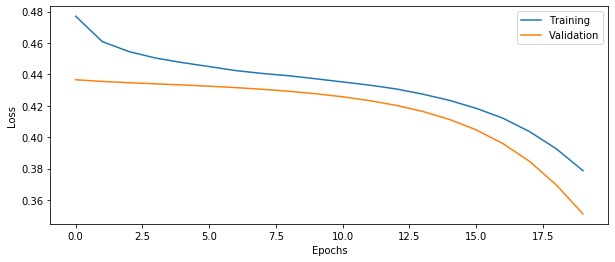

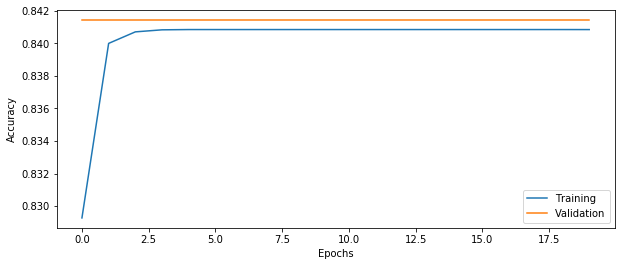

In [11]:
# Plot the history from the training run
plot_results(history1)

# Part 12: More questions

Question 9: What happens if you add several Dense layers without specifying the activation function?

### Answer 9: 

If no activation is defined then a linear activation is applied, meaning no calculation is done and the
input is forwarded as it is. In this case we could replace all dense layers with a single one. 

Question 10: How are the weights in each dense layer initialized as default? How are the bias weights initialized?

### Answer 10: 

The weights are initialized using **kernel_initializer()**. **The defefault is glorot_uniform. It generates a number from a uniform distribution ranging from the number of input data and the output size.** There are several initializer methods which
we can use to initialize to zeros, onces, constants, identity or orthogonal matrices or from a specific distribution.
For bias weights we use **bias_initializer()** that supports methods similar to kernel_initializer().

# Part 13: Balancing the classes

This dataset is rather unbalanced, we need to define class weights so that the training pays more attention to the class with fewer samples. We use a function in scikit learn

https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [12]:
from sklearn.utils import class_weight

# Calculate class weights

new_weights = class_weight.compute_class_weight(class_weight = "balanced", classes = np.array([0,1]), y = Ytrain)

# Print the class weights
print(new_weights)

[3.14174704 0.59463434]


### 2 layers, 20 nodes, class weights

In [13]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model2 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='sgd', 
                   learning_rate=0.1, use_bn=False, use_dropout=False, use_custom_dropout=False)

history2 = model2.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.4999 - accuracy: 0.8046 - val_loss: 0.4334 - val_accuracy: 0.8414
Epoch 2/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4656 - accuracy: 0.8374 - val_loss: 0.4316 - val_accuracy: 0.8414
Epoch 3/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4557 - accuracy: 0.8400 - val_loss: 0.4302 - val_accuracy: 0.8414
Epoch 4/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4486 - accuracy: 0.8407 - val_loss: 0.4289 - val_accuracy: 0.8414
Epoch 5/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4443 - accuracy: 0.8408 - val_loss: 0.4276 - val_accuracy: 0.8414
Epoch 6/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4408 - accuracy: 0.8409 - val_loss: 0.4260 - val_accuracy: 0.8414
Epoch 7/20
534895/534895 [==============================] - 

In [14]:
# Evaluate model on test data
score = model2.evaluate(Xtest, Ytest, batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 1us/step
Test loss: 0.2618
Test accuracy: 0.8402


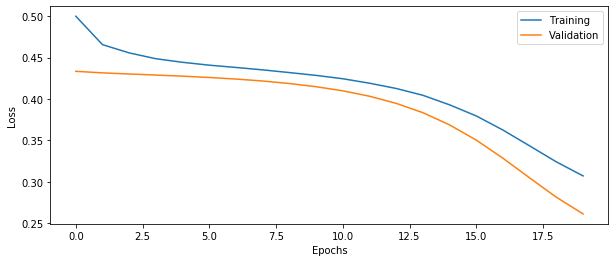

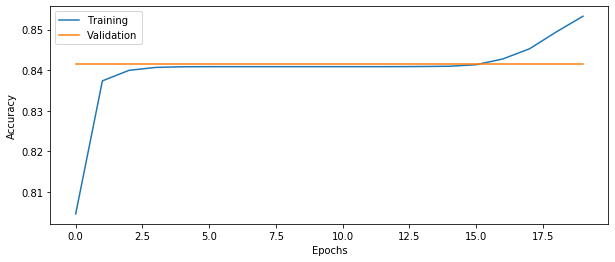

In [15]:
plot_results(history2)

# Part 14: More questions

Question 11: Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

### Answer 11: 

Training a network with a too large dataset would demand a considerable amount of memeory so it is broken into 
smaller user-defined batch sizes which will be fed as input to the DNN sequentially. This could also improve the speed as weights get constantly updated after each propagation.

Question 12: How busy is the GPU for a batch size of 100? How much GPU memory is used? Hint: run 'nvidia-smi' on the cloud computer a few times during training.

### Answer 12:
When batch size is set to 100 the GPU is busy in a range of 14 to 16 percent. Also, 438 MB of GPU memory is used in total. However, 154 MB of that was already in use for other processes. 

Question 13: What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

### Answer 13:

For batch size = 100 --> $\sim$ 12 seconds<br />
For batch size = 1000 --> $\sim$ 3 seconds<br />
For batch size = 10000 --> $\sim$ 1 second<br />
Using a small batch size does not make full use of GPU. On the other hand, a larger batch size parallelizes the GPU memory and significantly speeds up the training. 

Question 14: How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

### Answer 14:

For batch size = 100 --> 534895/100 $\sim$ 5349 <br />
For batch size = 1000 --> 534895/1000 $\sim$ 535 <br />
For batch size = 10000 --> 534895/1000 $\sim$ 53 <br />

Question 15: What limits how large the batch size can be?

### Answer 15:

The batch size is limited by the amount of GPU memory. Also when a network grows larger, the batch size that can be run on the GPU memory gets smaller.  

Question 16: Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?

### Answer 16:

They are directly related, meaning if the batch size is decreased, the learning rate shoud also decrease. This is because there are more weight updates for smaller batch sizes which increases the uncertainty of the gradient. Therefore a smaller learning rate is required. 

Lets use a batch size of 10,000 from now on, and a learning rate of 0.1.

# Part 15: Increasing the complexity

Lets try some different configurations of number of layers and number of nodes per layer.

Question 17: How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()

In [16]:
model450 = build_DNN(input_shape=input_shape, n_layers=4, n_nodes=50, act_fun='sigmoid', optimizer='sgd', 
                   learning_rate=0.1, use_bn=False, use_dropout=False, use_custom_dropout=False)

history450 = model450.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 6s 12us/step - loss: 0.4706 - accuracy: 0.8356 - val_loss: 0.4377 - val_accuracy: 0.8414
Epoch 2/20
534895/534895 [==============================] - 6s 11us/step - loss: 0.4589 - accuracy: 0.8403 - val_loss: 0.4375 - val_accuracy: 0.8414
Epoch 3/20
534895/534895 [==============================] - 6s 11us/step - loss: 0.4532 - accuracy: 0.8408 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 4/20
534895/534895 [==============================] - 6s 11us/step - loss: 0.4499 - accuracy: 0.8408 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 5/20
534895/534895 [==============================] - 6s 11us/step - loss: 0.4479 - accuracy: 0.8409 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 6/20
534895/534895 [==============================] - 6s 11us/step - loss: 0.4461 - accuracy: 0.8409 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 7/20
534895/534895 [============================

In [17]:
model450.summary()
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                4650      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)               

### Answer 17:

We can see the number of trainable parameters using 4 dense layers with 50 hidden nodes is almost 7 times that of the model with 2 layers and 20 nodes.

### 4 layers, 20 nodes, class weights

In [18]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model3 = build_DNN(input_shape=input_shape, n_layers=4, n_nodes=20, act_fun='sigmoid', optimizer='sgd', 
                   learning_rate=0.1, use_bn=False, use_dropout=False, use_custom_dropout=False)

history3 = model3.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 3s 5us/step - loss: 0.5455 - accuracy: 0.7682 - val_loss: 0.4375 - val_accuracy: 0.8414
Epoch 2/20
534895/534895 [==============================] - 2s 5us/step - loss: 0.4607 - accuracy: 0.8407 - val_loss: 0.4374 - val_accuracy: 0.8414
Epoch 3/20
534895/534895 [==============================] - 2s 5us/step - loss: 0.4538 - accuracy: 0.8409 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 4/20
534895/534895 [==============================] - 2s 5us/step - loss: 0.4496 - accuracy: 0.8409 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 5/20
534895/534895 [==============================] - 2s 5us/step - loss: 0.4469 - accuracy: 0.8409 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 6/20
534895/534895 [==============================] - 2s 5us/step - loss: 0.4450 - accuracy: 0.8409 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 7/20
534895/534895 [==============================] - 

In [19]:
# Evaluate model on test data
score = model3.evaluate(Xtest, Ytest, batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.4394
Test accuracy: 0.8402


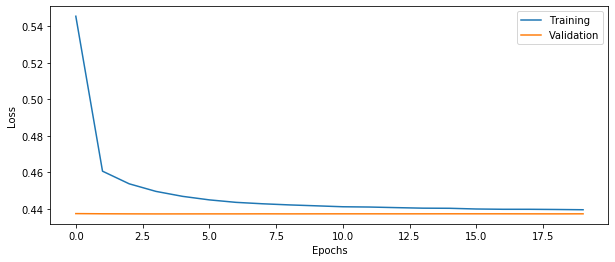

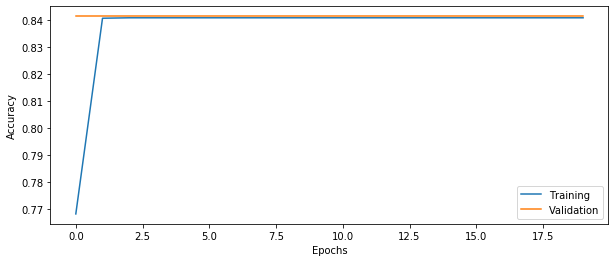

In [20]:
plot_results(history3)

### 2 layers, 50 nodes, class weights

In [21]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model4 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=50, act_fun='sigmoid', optimizer='sgd', 
                   learning_rate=0.1, use_bn=False, use_dropout=False, use_custom_dropout=False)

history4 = model4.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 3s 6us/step - loss: 0.4796 - accuracy: 0.8225 - val_loss: 0.4313 - val_accuracy: 0.8414
Epoch 2/20
534895/534895 [==============================] - 3s 5us/step - loss: 0.4540 - accuracy: 0.8399 - val_loss: 0.4283 - val_accuracy: 0.8414
Epoch 3/20
534895/534895 [==============================] - 3s 5us/step - loss: 0.4448 - accuracy: 0.8407 - val_loss: 0.4258 - val_accuracy: 0.8414
Epoch 4/20
534895/534895 [==============================] - 3s 5us/step - loss: 0.4392 - accuracy: 0.8408 - val_loss: 0.4230 - val_accuracy: 0.8414
Epoch 5/20
534895/534895 [==============================] - 3s 5us/step - loss: 0.4341 - accuracy: 0.8408 - val_loss: 0.4195 - val_accuracy: 0.8414
Epoch 6/20
534895/534895 [==============================] - 3s 5us/step - loss: 0.4296 - accuracy: 0.8409 - val_loss: 0.4149 - val_accuracy: 0.8414
Epoch 7/20
534895/534895 [==============================] - 

In [22]:
# Evaluate model on test data
score = model4.evaluate(Xtest, Ytest, batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1901
Test accuracy: 0.9033


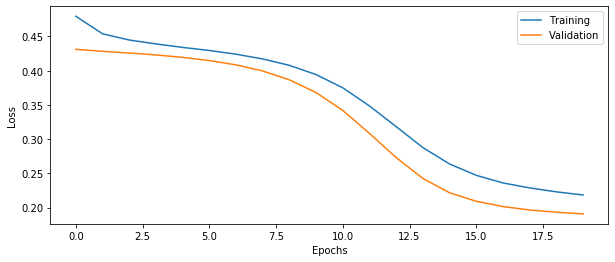

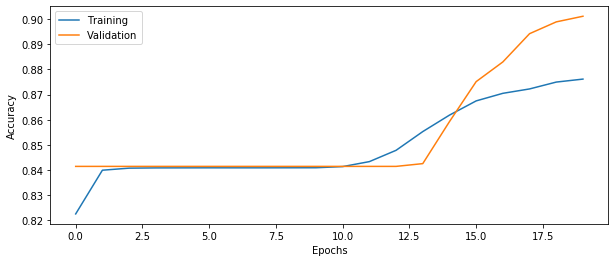

In [23]:
plot_results(history4)

### 4 layers, 50 nodes, class weights

In [24]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model5 = build_DNN(input_shape=input_shape, n_layers=4, n_nodes=50, act_fun='sigmoid', optimizer='sgd', 
                   learning_rate=0.1, use_bn=False, use_dropout=False, use_custom_dropout=False)

history5 = model5.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 6s 11us/step - loss: 0.4753 - accuracy: 0.8326 - val_loss: 0.4379 - val_accuracy: 0.8414
Epoch 2/20
534895/534895 [==============================] - 5s 10us/step - loss: 0.4613 - accuracy: 0.8401 - val_loss: 0.4376 - val_accuracy: 0.8414
Epoch 3/20
534895/534895 [==============================] - 5s 10us/step - loss: 0.4545 - accuracy: 0.8408 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 4/20
534895/534895 [==============================] - 6s 10us/step - loss: 0.4504 - accuracy: 0.8408 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 5/20
534895/534895 [==============================] - 6s 11us/step - loss: 0.4478 - accuracy: 0.8409 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 6/20
534895/534895 [==============================] - 5s 10us/step - loss: 0.4458 - accuracy: 0.8409 - val_loss: 0.4373 - val_accuracy: 0.8414
Epoch 7/20
534895/534895 [============================

In [25]:
# Evaluate model on test data
score = model5.evaluate(Xtest, Ytest, batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 3us/step
Test loss: 0.4394
Test accuracy: 0.8402


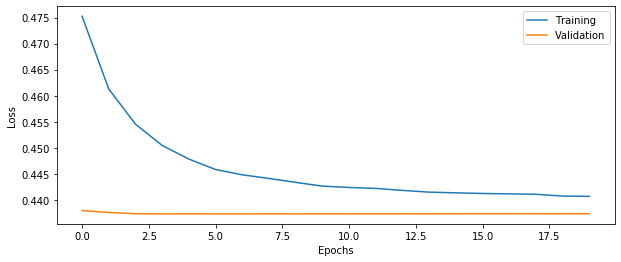

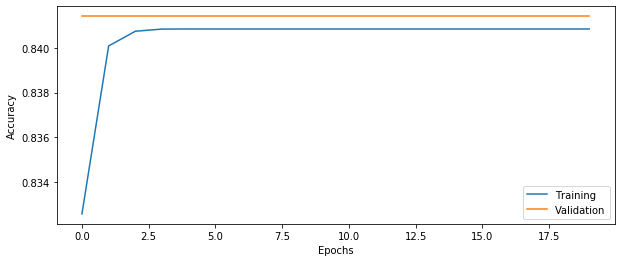

In [26]:
plot_results(history5)

# Part 16: Batch normalization

Now add batch normalization after each dense layer. Remember to import BatchNormalization from keras.layers. 

See https://keras.io/layers/normalization/ for information about how to call the function.

Question 18: Why is batch normalization important when training deep networks?

### Answer 18:

It improves training speed as well as the model's stability and performance. Normalized batches allow larger learning rates which causes the network to converge faster. When learning rate is large, gradient descent requires less number of iterations and leads to a faster convergence. There are several other benefits associated with batch normalization.  

### 2 layers, 20 nodes, class weights, batch normalization

In [27]:
from keras.layers.normalization import BatchNormalization

# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model6 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='sgd', 
                   learning_rate=0.1, use_bn=True, use_dropout=False, use_custom_dropout=False)

history6 = model6.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.4915 - accuracy: 0.8052 - val_loss: 0.4292 - val_accuracy: 0.8414
Epoch 2/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.4263 - accuracy: 0.8394 - val_loss: 0.4106 - val_accuracy: 0.8414
Epoch 3/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.3842 - accuracy: 0.8411 - val_loss: 0.3750 - val_accuracy: 0.8414
Epoch 4/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.3410 - accuracy: 0.8436 - val_loss: 0.3243 - val_accuracy: 0.8414
Epoch 5/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.3046 - accuracy: 0.8488 - val_loss: 0.2752 - val_accuracy: 0.8414
Epoch 6/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.2770 - accuracy: 0.8548 - val_loss: 0.2402 - val_accuracy: 0.8414
Epoch 7/20
534895/534895 [==============================] - 

In [28]:
# Evaluate model on test data
score = model6.evaluate(Xtest, Ytest, batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1705
Test accuracy: 0.9129


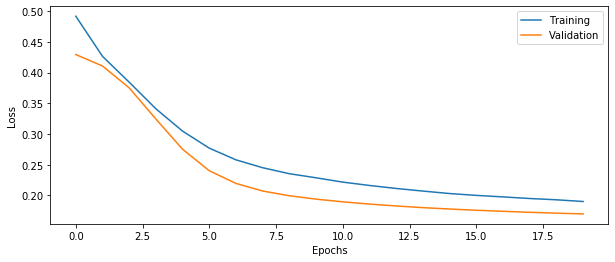

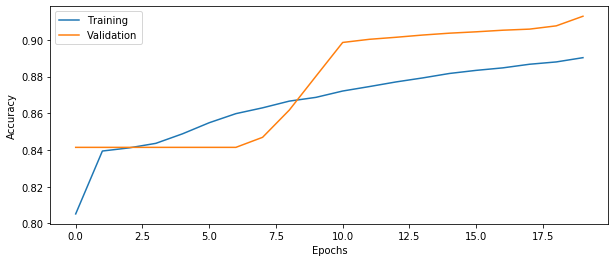

In [29]:
plot_results(history6)

# Part 17: Activation function

Try changing the activation function in each layer from sigmoid to ReLU, write down the test accuracy.

Note: the last layer should still have a sigmoid activation function.

### 2 layers, 20 nodes, class weights, ReLU, no batch normalization

In [30]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model7 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, act_fun='relu', optimizer='sgd', 
                   learning_rate=0.1, use_bn=False, use_dropout=False, use_custom_dropout=False)

history7 = model7.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.3325 - accuracy: 0.8512 - val_loss: 0.2035 - val_accuracy: 0.8788
Epoch 2/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.2093 - accuracy: 0.8781 - val_loss: 0.1859 - val_accuracy: 0.8974
Epoch 3/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.1930 - accuracy: 0.8896 - val_loss: 0.1769 - val_accuracy: 0.9031
Epoch 4/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.1839 - accuracy: 0.8963 - val_loss: 0.1710 - val_accuracy: 0.9068
Epoch 5/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.1780 - accuracy: 0.9020 - val_loss: 0.1667 - val_accuracy: 0.9090
Epoch 6/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.1734 - accuracy: 0.9055 - val_loss: 0.1635 - val_accuracy: 0.9159
Epoch 7/20
534895/534895 [==============================] - 

In [31]:
# Evaluate model on test data
score = model7.evaluate(Xtest, Ytest, batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1526
Test accuracy: 0.9196


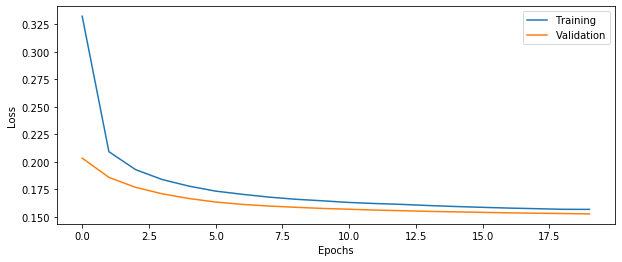

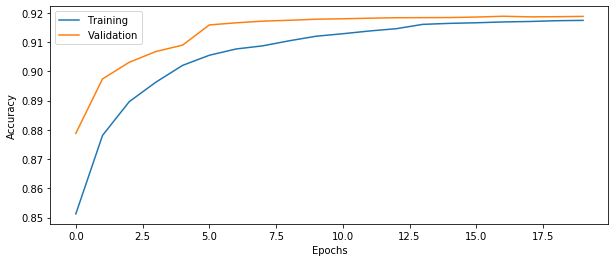

In [32]:
plot_results(history7)

# Part 18: Optimizer

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from keras.optimizers. 

https://keras.io/optimizers/


### 2 layers, 20 nodes, class weights, Adam optimizer, no batch normalization, sigmoid activations

In [33]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model8 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='adam', 
                   learning_rate=0.1, use_bn=False, use_dropout=False, use_custom_dropout=False)

history8 = model8.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.2611 - accuracy: 0.8657 - val_loss: 0.1608 - val_accuracy: 0.9145
Epoch 2/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.1618 - accuracy: 0.9147 - val_loss: 0.1539 - val_accuracy: 0.9194
Epoch 3/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.1552 - accuracy: 0.9187 - val_loss: 0.1504 - val_accuracy: 0.9198
Epoch 4/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.1502 - accuracy: 0.9195 - val_loss: 0.1452 - val_accuracy: 0.9201
Epoch 5/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.1465 - accuracy: 0.9204 - val_loss: 0.1441 - val_accuracy: 0.9205
Epoch 6/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.1440 - accuracy: 0.9208 - val_loss: 0.1435 - val_accuracy: 0.9213
Epoch 7/20
534895/534895 [==============================] - 

In [34]:
# Evaluate model on test data
score = model8.evaluate(Xtest, Ytest, batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.1382
Test accuracy: 0.9222


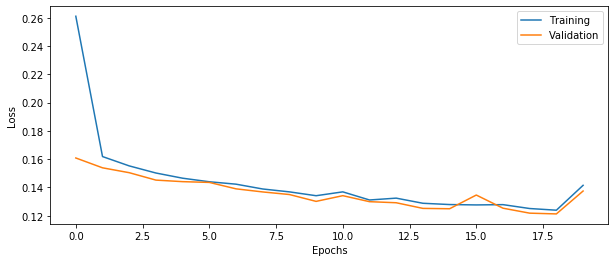

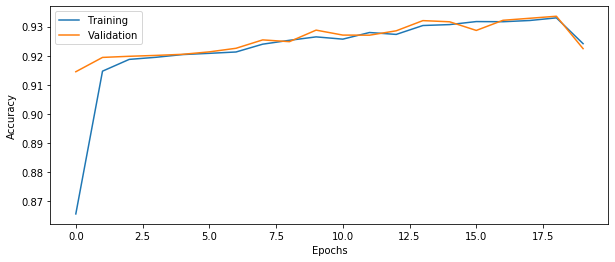

In [35]:
plot_results(history8)

# Part 19: Dropout regularization

Dropout is a type of regularization that can improve accuracy for validation and test data. 

Add a Dropout layer after each Dense layer (but not after the final dense layer), with a dropout probability of 50%. Remember to first import the Dropout layer from keras.layers

See https://keras.io/layers/core/ for how the Dropout layer works.

---

Question 19: How does the validation accuracy change when adding dropout?

### Answer 19: 
The validation accuracy remains constant at around 84% which is lower than what we obtained without using dropout.

Question 20: How does the test accuracy change when adding dropout?

### Answer 20: 
Similarly, the test accuracy is approximately 84%, less than models without the usage of dropout.

### 2 layers, 20 nodes, class weights, dropout, SGD optimizer, no batch normalization, sigmoid activations

In [36]:
# Setup some training parameters
batch_size = 10000
epochs = 20
input_shape = (92,)

# Build and train model
model9 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=20, act_fun='sigmoid', optimizer='sgd', 
                   learning_rate=0.1, use_bn=False, use_dropout=True, use_custom_dropout=False)

history9 = model9.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 2s 4us/step - loss: 0.4763 - accuracy: 0.8277 - val_loss: 0.4335 - val_accuracy: 0.8414
Epoch 2/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4568 - accuracy: 0.8400 - val_loss: 0.4313 - val_accuracy: 0.8414
Epoch 3/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4502 - accuracy: 0.8407 - val_loss: 0.4295 - val_accuracy: 0.8414
Epoch 4/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4454 - accuracy: 0.8408 - val_loss: 0.4278 - val_accuracy: 0.8414
Epoch 5/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4418 - accuracy: 0.8408 - val_loss: 0.4260 - val_accuracy: 0.8414
Epoch 6/20
534895/534895 [==============================] - 2s 3us/step - loss: 0.4384 - accuracy: 0.8409 - val_loss: 0.4239 - val_accuracy: 0.8414
Epoch 7/20
534895/534895 [==============================] - 

In [37]:
# Evaluate model on test data
score = model9.evaluate(Xtest, Ytest, batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 2us/step
Test loss: 0.2542
Test accuracy: 0.8402


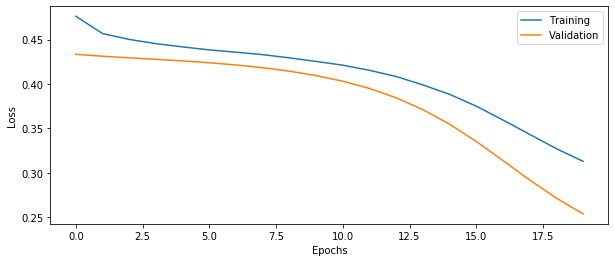

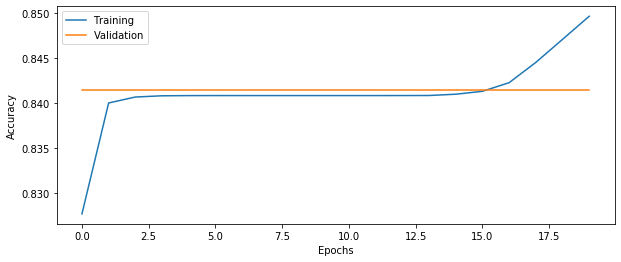

In [38]:
plot_results(history9)

# Part 20: Improving performance

Spend some time (30 - 90 minutes) playing with the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

Question 21: How high classification accuracy can you achieve for the test data? What is your best configuration?

In [39]:
# Find your best configuration for the DNN

batch_size = 1000
epochs = 20
input_shape = (92,)

# Build and train model
modelT = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=32, act_fun='relu', optimizer='adam', 
                   learning_rate=0.01, use_bn=True, use_dropout=False, use_custom_dropout=False)

historyT = modelT.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 4s 8us/step - loss: 0.1550 - accuracy: 0.9154 - val_loss: 0.1502 - val_accuracy: 0.9162
Epoch 2/20
534895/534895 [==============================] - 4s 7us/step - loss: 0.1444 - accuracy: 0.9191 - val_loss: 0.1427 - val_accuracy: 0.9202
Epoch 3/20
534895/534895 [==============================] - 4s 7us/step - loss: 0.1373 - accuracy: 0.9247 - val_loss: 0.1553 - val_accuracy: 0.9135
Epoch 4/20
534895/534895 [==============================] - 4s 7us/step - loss: 0.1316 - accuracy: 0.9278 - val_loss: 0.1320 - val_accuracy: 0.9275
Epoch 5/20
534895/534895 [==============================] - 4s 8us/step - loss: 0.1265 - accuracy: 0.9309 - val_loss: 0.1270 - val_accuracy: 0.9293
Epoch 6/20
534895/534895 [==============================] - 4s 8us/step - loss: 0.1235 - accuracy: 0.9322 - val_loss: 0.1303 - val_accuracy: 0.9293
Epoch 7/20
534895/534895 [==============================] - 

In [40]:
# Evaluate DNN on test data
score = modelT.evaluate(Xtest, Ytest, batch_size=batch_size)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 3us/step
Test loss: 0.1252
Test accuracy: 0.9337


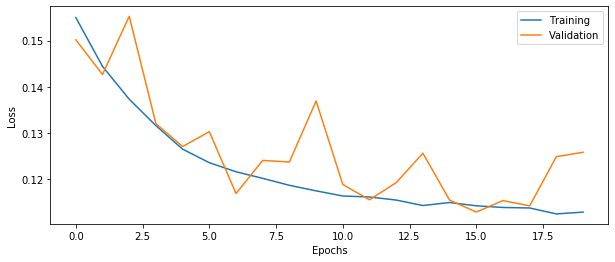

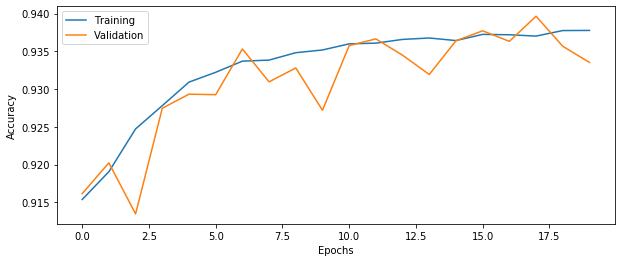

In [41]:
plot_results(historyT)

# Part 21: Dropout uncertainty

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this paper http://proceedings.mlr.press/v48/gal16.pdf

To achieve this, we need to redefine the Keras Dropout call by running the cell below, and use 'myDropout' in each call to Dropout, in the cell that defines the DNN.

Run the same test data through the trained network 100 times, with dropout turned on. 

Question 22: What is the mean and the standard deviation of the test accuracy?

In [42]:
import keras
import keras.backend as K

class myDropout(keras.layers.Dropout):
    """Applies Dropout to the input.
    Dropout consists in randomly setting
    a fraction `rate` of input units to 0 at each update during training time,
    which helps prevent overfitting.
    # Arguments
        rate: float between 0 and 1. Fraction of the input units to drop.
        noise_shape: 1D integer tensor representing the shape of the
            binary dropout mask that will be multiplied with the input.
            For instance, if your inputs have shape
            `(batch_size, timesteps, features)` and
            you want the dropout mask to be the same for all timesteps,
            you can use `noise_shape=(batch_size, 1, features)`.
        seed: A Python integer to use as random seed.
    # References
        - [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](
           http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)
    """
    def __init__(self, rate, training=True, noise_shape=None, seed=None, **kwargs):
        super(myDropout, self).__init__(rate, noise_shape=None, seed=None,**kwargs)
        self.training = training

        
    def call(self, inputs, training=None):
        if 0. < self.rate < 1.:
            noise_shape = self._get_noise_shape(inputs)

            def dropped_inputs():
                return K.dropout(inputs, self.rate, noise_shape,
                                 seed=self.seed)
            if not training: 
                return K.in_train_phase(dropped_inputs, inputs, training=self.training)
            return K.in_train_phase(dropped_inputs, inputs, training=training)
        return inputs

### Your best config, custom dropout

In [43]:
# Your best training parameters

batch_size = 1000
epochs = 20
input_shape = (92,)

# Build and train model
model11 = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=32, act_fun='relu', optimizer='adam', 
                   learning_rate=0.01, use_bn=True, use_dropout=False, use_custom_dropout=True)

history11 = model11.fit(x=Xtrain, y=Ytrain, batch_size=batch_size, 
                      epochs=epochs, verbose=1, validation_data=(Xval, Yval), class_weight=new_weights)

Train on 534895 samples, validate on 114621 samples
Epoch 1/20
534895/534895 [==============================] - 5s 9us/step - loss: 0.1703 - accuracy: 0.9080 - val_loss: 0.1562 - val_accuracy: 0.9141
Epoch 2/20
534895/534895 [==============================] - 4s 8us/step - loss: 0.1556 - accuracy: 0.9153 - val_loss: 0.1547 - val_accuracy: 0.9152
Epoch 3/20
534895/534895 [==============================] - 4s 8us/step - loss: 0.1543 - accuracy: 0.9156 - val_loss: 0.1526 - val_accuracy: 0.9157
Epoch 4/20
534895/534895 [==============================] - 5s 9us/step - loss: 0.1528 - accuracy: 0.9165 - val_loss: 0.1532 - val_accuracy: 0.9160
Epoch 5/20
534895/534895 [==============================] - 4s 8us/step - loss: 0.1528 - accuracy: 0.9166 - val_loss: 0.1537 - val_accuracy: 0.9151
Epoch 6/20
534895/534895 [==============================] - 4s 8us/step - loss: 0.1522 - accuracy: 0.9174 - val_loss: 0.1501 - val_accuracy: 0.9177
Epoch 7/20
534895/534895 [==============================] - 

In [44]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = model11.evaluate(Xtest, Ytest, batch_size=batch_size)
                       
print('Test accuracy: %.4f' % score[1])

114621/114621 [==============================] - 0s 3us/step
Test accuracy: 0.9195


In [45]:
# Run the testing 100 times, and save the accuracies in an array
scores = np.array([])
for i in range(100):
    score = model11.evaluate(Xtest, Ytest, batch_size=batch_size)
    scores = np.append(scores, score[1])

114621/114621 [==============================] - 0s 3us/step


In [46]:
# Calculate and print mean and std of accuracies
print(np.round(np.mean(scores), 5))
print(np.round(np.std(scores), 5))

0.91957
0.00013


# Part 22: Cross validation uncertainty

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a help function from scikit-learn to setup the CV, see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html . Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.

---

Question 23: What is the mean and the standard deviation of the test accuracy?

### Answer 23:
The mean of test accuracies is: **0.91957** and the standard deviations is: **0.00013** (close to zero)

Question 24: What is the main advantage of dropout compared to CV for estimating test uncertainty?

### Answer 24:
In dropout, we train the model only once and find the uncertainty through several evaluations on the test data which is a much faster compared to CV. In CV we train the model for every fold and test it on the test data of that fold which requires more time and computations.

In [62]:
from sklearn.model_selection import StratifiedKFold

# Define 10-fold cross validation
batch_size = 1000
epochs = 20
input_shape = (92,)

folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
folds.get_n_splits(X, Y)
fold_weight = []
scoresK = np.array([])

for train_index, test_index in folds.split(X, Y):    
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    Kweights = class_weight.compute_class_weight(class_weight = "balanced", classes = np.array([0,1]), y = y_train)
    
    modelK = build_DNN(input_shape=input_shape, n_layers=2, n_nodes=32, act_fun='relu', optimizer='adam', 
                   learning_rate=0.01, use_bn=True, use_dropout=False, use_custom_dropout=False)

    historyK = modelK.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, class_weight=Kweights)
    
    score = modelK.evaluate(X_test, y_test, batch_size=batch_size)
    scoresK = np.append(scoresK, score[1])
    

print('Mean of fold scores: %.4f' % np.mean(scoresK))
print('Standard deviation of fold scores: %.4f' % np.std(scoresK))


76413/76413 [==============================] - 2s 22us/step
Mean of fold scores: 0.9369
Standard deviation of fold scores: 0.0022


# Part 23: DNN regression

A similar DNN can be used for regression, instead of classification.

Question 25: How would you change the DNN in order to use it for regression instead?

### Answer 25:
Since regression problems deal with continueous variables, the activation function should be chosen accordingly. The sigmoid function we used in this lab outputs a value between 0 and 1 and therefore is suitable for our dataset. Other activations like linear activation function could be used to adjust this model for a regression problem. In addition, we are using *binary_crossentropy* that is suitable for a model with a binary output. For regression problems *mean squared error* would be the proper loss function. 

## Report

Send in this jupyter notebook, with answers to all questions.